In [ ]:
# Load the dataset into a DataFrame
import pandas as pd

df = pd.read_csv("data/personality_dataset.csv")
df.head()  # Display the first rows

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [ ]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [ ]:
# Count missing values in each column
df.isnull().sum()

,0
Time_spent_Alone,63
Stage_fear,73
Social_event_attendance,62
Going_outside,66
Drained_after_socializing,52
Friends_circle_size,77
Post_frequency,65
Personality,0


In [ ]:
# Check class distribution of the target variable
df["Personality"].value_counts()

,count
Personality,
Extrovert,1491
Introvert,1409


In [ ]:
# Fill missing values in numeric columns with the column mean
df.fillna({
    'Time_spent_Alone': df['Time_spent_Alone'].mean(),
    'Social_event_attendance': df['Social_event_attendance'].mean(),
    'Going_outside': df['Going_outside'].mean(),
    'Friends_circle_size': df['Friends_circle_size'].mean(),
    'Post_frequency': df['Post_frequency'].mean()
}, inplace=True)

# Fill missing values in categorical columns with the most frequent value
df['Stage_fear'].fillna(df['Stage_fear'].mode()[0], inplace=True)
df['Drained_after_socializing'].fillna(df['Drained_after_socializing'].mode()[0], inplace=True)


<ipython-input-43-0ccc1311c982>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Stage_fear'].fillna(df['Stage_fear'].mode()[0], inplace=True)
<ipython-input-43-0ccc1311c982>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [ ]:
# Convert categorical columns to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Stage_fear'] = le.fit_transform(df['Stage_fear'])
df['Drained_after_socializing'] = le.fit_transform(df['Drained_after_socializing'])
df['Personality'] = le.fit_transform(df['Personality'])

In [ ]:
# Split data into features (X) and target (y)
X = df.drop('Personality', axis=1)
y = df['Personality']

In [ ]:
# Split data into training and test sets (%80 train, %20 test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Create and train a logistic regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions and evaluate accuracy
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9241379310344827


In [ ]:
# Evaluate model performance
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Precision, Recall, F1-score
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

Confusion Matrix:
 [[278  24]
 [ 20 258]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       302
           1       0.91      0.93      0.92       278

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



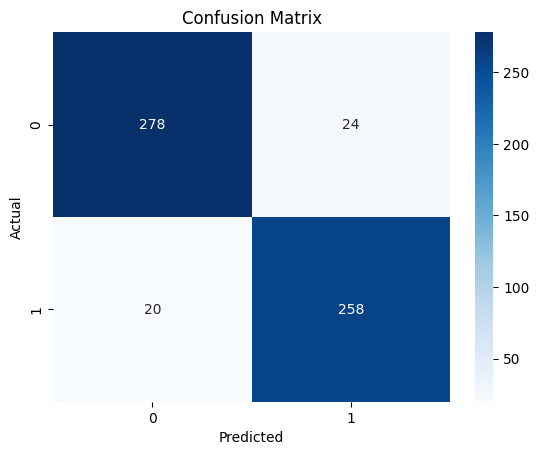

In [ ]:
# Visualize the confusion matrix as a heatmap
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

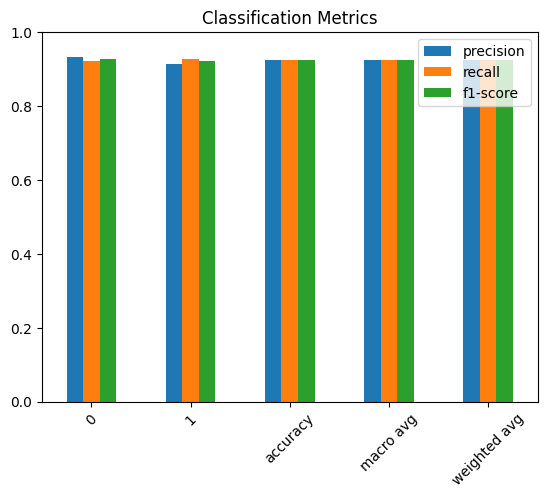

In [ ]:
# Plot precision, recall, and f1-score as a bar chart
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('Classification Metrics')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()